In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import catboost as cb
import lightgbm as lgb

import optuna  # pip install optuna
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold

from optuna.integration import LightGBMPruningCallback

from sklearn.metrics import accuracy_score

import xgboost as xgb
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from pickle import dump, load
import pickle

In [2]:
train = pd.read_csv(r"C:\Users\DELL\Downloads\spaceship-titanic\train.csv")
test = pd.read_csv(r"C:\Users\DELL\Downloads\spaceship-titanic\test.csv")

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
first_check = ['HomePlanet', 'CryoSleep', 'VIP', 'Destination']

for i in first_check:
    print('Survival correlation by'+i)
    print(train[[i, 'Transported']].groupby(i).mean())
    print('---------------')

Survival correlation byHomePlanet
            Transported
HomePlanet             
Earth          0.423946
Europa         0.658846
Mars           0.523024
---------------
Survival correlation byCryoSleep
           Transported
CryoSleep             
False         0.328921
True          0.817583
---------------
Survival correlation byVIP
       Transported
VIP               
False     0.506332
True      0.381910
---------------
Survival correlation byDestination
               Transported
Destination               
55 Cancri e       0.610000
PSO J318.5-22     0.503769
TRAPPIST-1e       0.471175
---------------


<Axes: xlabel='Destination', ylabel='Transported'>

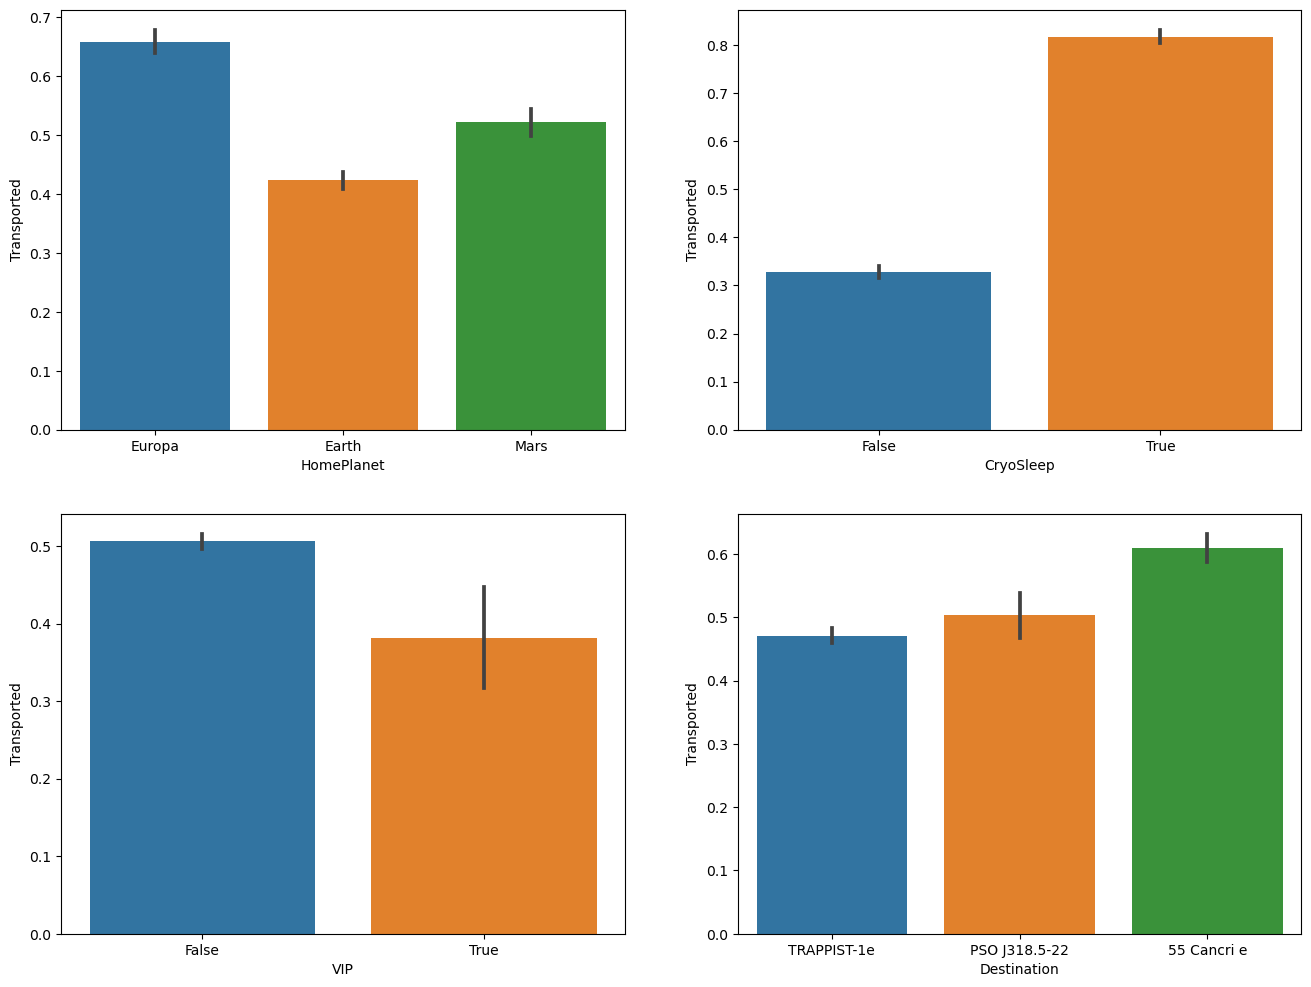

In [23]:
fig, axes = plt.subplots(2,2, figsize=(16,12))

sns.barplot(x='HomePlanet', y='Transported', data=train, ax=axes[0,0])
sns.barplot(x='CryoSleep', y='Transported', data=train, ax=axes[0,1])
sns.barplot(x='VIP', y='Transported', data=train, ax=axes[1,0])
sns.barplot(x='Destination', y='Transported', data=train, ax=axes[1,1])

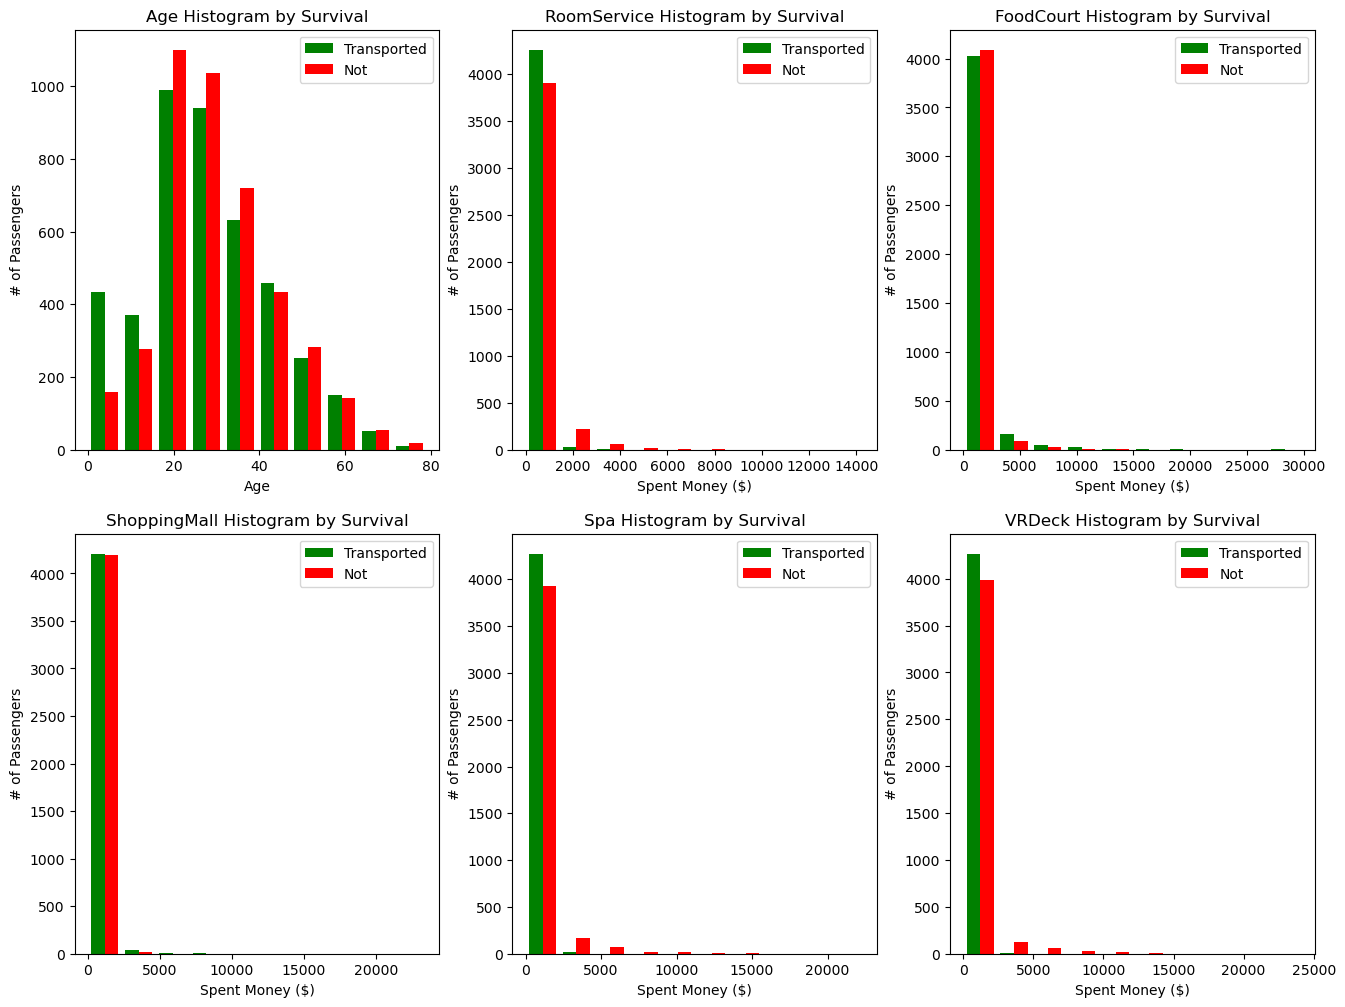

In [42]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.hist(x = [train[train['Transported']==1]['Age'], train[train['Transported']==0]['Age']], 
         stacked=False, color = ['g','r'],label = ['Transported','Not'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(232)
plt.hist(x = [train[train['Transported']==1]['RoomService'], train[train['Transported']==0]['RoomService']], 
         stacked=False, color = ['g','r'],label = ['Transported','Not'])
plt.title('RoomService Histogram by Survival')
plt.xlabel('Spent Money ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(233)
plt.hist(x = [train[train['Transported']==1]['FoodCourt'], train[train['Transported']==0]['FoodCourt']], 
         stacked=False, color = ['g','r'],label = ['Transported','Not'])
plt.title('FoodCourt Histogram by Survival')
plt.xlabel('Spent Money ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(234)
plt.hist(x = [train[train['Transported']==1]['ShoppingMall'], train[train['Transported']==0]['ShoppingMall']], 
         stacked=False, color = ['g','r'],label = ['Transported','Not'])
plt.title('ShoppingMall Histogram by Survival')
plt.xlabel('Spent Money ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [train[train['Transported']==1]['Spa'], train[train['Transported']==0]['Spa']], 
         stacked=False, color = ['g','r'],label = ['Transported','Not'])
plt.title('Spa Histogram by Survival')
plt.xlabel('Spent Money ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [train[train['Transported']==1]['VRDeck'], train[train['Transported']==0]['VRDeck']], 
         stacked=False, color = ['g','r'],label = ['Transported','Not'])
plt.title('VRDeck Histogram by Survival')
plt.xlabel('Spent Money ($)')
plt.ylabel('# of Passengers')
plt.legend()

Text(0.5, 1.0, 'VRDeck Age Survival Comparison')

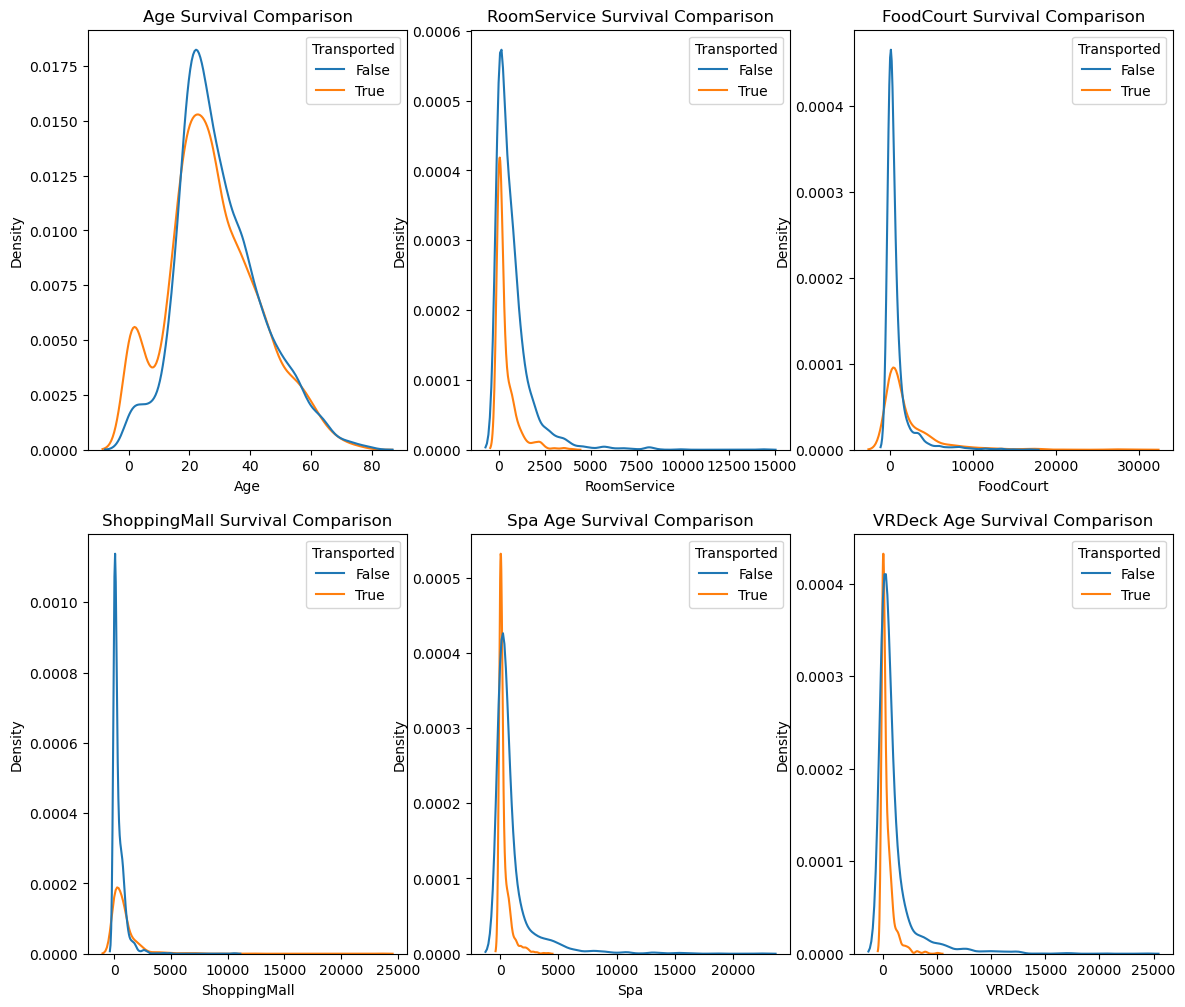

In [41]:
#without 0 values

fig, axes = plt.subplots(2,3,figsize=(14,12))

sns.kdeplot(x = 'Age', hue='Transported' ,data = train, ax = axes[0,0])
axes[0,0].set_title('Age Survival Comparison')

sns.kdeplot(x = 'RoomService', hue='Transported' ,data = train.iloc[train.loc[train['RoomService']!=0].index], ax = axes[0,1])
axes[0,1].set_title('RoomService Survival Comparison')

sns.kdeplot(x = 'FoodCourt', hue='Transported' ,data = train.iloc[train.loc[train['FoodCourt']!=0].index], ax = axes[0,2])
axes[0,2].set_title('FoodCourt Survival Comparison')

sns.kdeplot(x = 'ShoppingMall', hue='Transported' ,data = train.iloc[train.loc[train['ShoppingMall']!=0].index], ax = axes[1,0])
axes[1,0].set_title('ShoppingMall Survival Comparison')

sns.kdeplot(x = 'Spa', hue='Transported' ,data = train.iloc[train.loc[train['Spa']!=0].index], ax = axes[1,1])
axes[1,1].set_title('Spa Survival Comparison')

sns.kdeplot(x = 'VRDeck', hue='Transported' ,data = train.iloc[train.loc[train['VRDeck']!=0].index], ax = axes[1,2])
axes[1,2].set_title('VRDeck Survival Comparison')

In [3]:
train['Age_bin'] = pd.qcut(train.loc[:,'Age'], 10)
train['Spa_bin'] = pd.cut(train.loc[:,'Spa'], bins=(-0.1, 0.1, 100, 500, 1000, 3000, 5000, 15000, 25000))
train['RoomService_bin'] = pd.cut(train.loc[:,'RoomService'], bins=(-0.1, 0.1, 100, 500, 1000, 3000, 5000, 15000, 25000))
train['ShoppingMall_bin'] = pd.cut(train.loc[:,'ShoppingMall'], bins=(-0.1, 0.1, 100, 500, 1000, 3000, 5000, 15000, 25000))
train['VRDeck_bin'] = pd.cut(train.loc[:,'VRDeck'], bins=(-0.1, 0.1, 100, 500, 1000, 3000, 5000, 15000, 25000))
train['FoodCourt_bin'] = pd.cut(train.loc[:,'FoodCourt'], bins=(-0.1, 0.1, 100, 500, 1000, 3000, 5000, 15000, 30000))

In [4]:
pd.qcut(train.loc[:,'Age'], 10).value_counts()

Age
(-0.001, 13.0]    947
(13.0, 18.0]      918
(35.0, 41.0]      911
(21.0, 24.0]      907
(27.0, 31.0]      882
(18.0, 21.0]      881
(49.0, 79.0]      811
(41.0, 49.0]      791
(24.0, 27.0]      770
(31.0, 35.0]      696
Name: count, dtype: int64

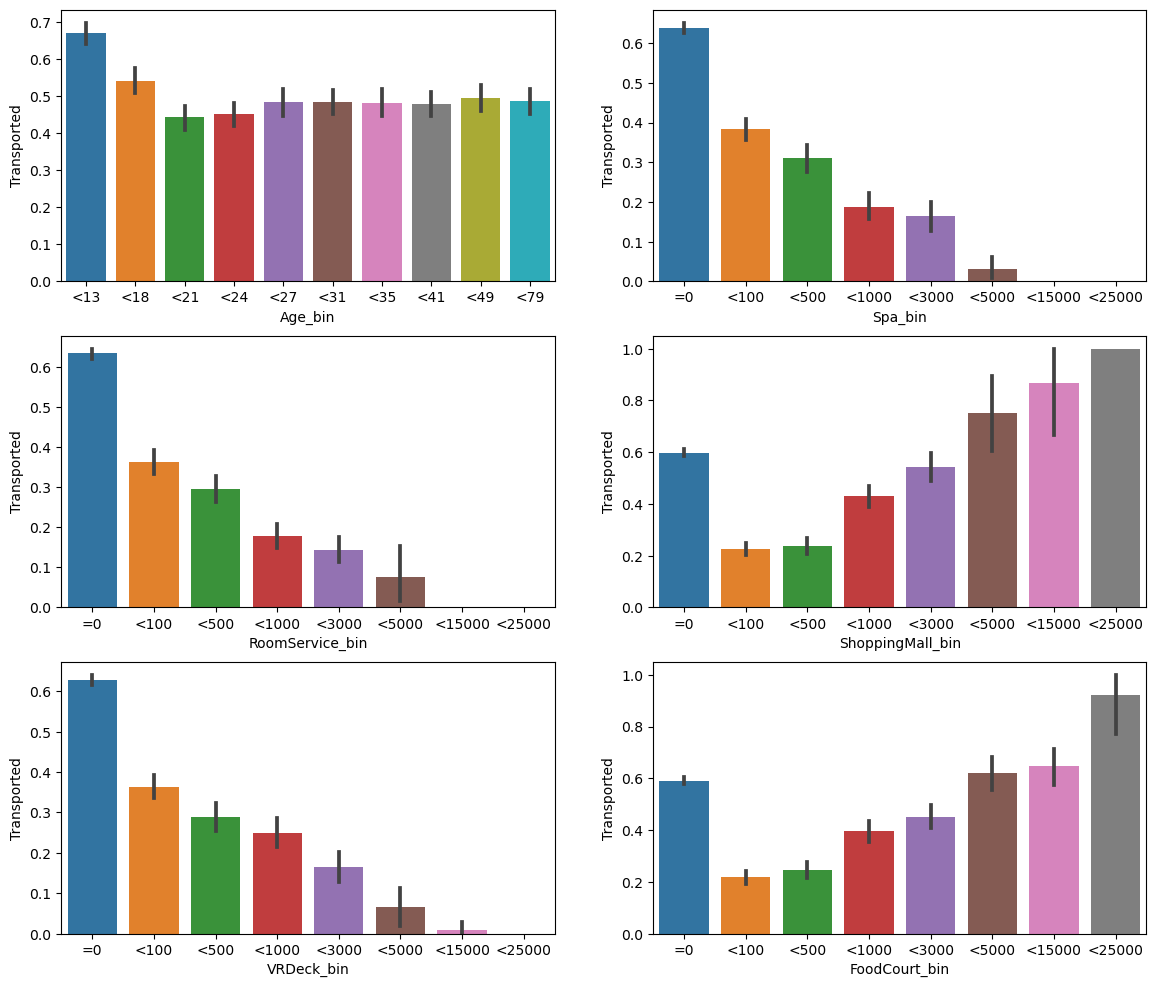

In [61]:
fig, axes = plt.subplots(3,2,figsize=(14,12))

sns.barplot(x='Age_bin', y='Transported', data=train, ax=axes[0,0])
sns.barplot(x='Spa_bin', y='Transported', data=train, ax=axes[0,1])
sns.barplot(x='RoomService_bin', y='Transported', data=train, ax=axes[1,0])

sns.barplot(x='ShoppingMall_bin', y='Transported', data=train, ax=axes[1,1])
sns.barplot(x='VRDeck_bin', y='Transported', data=train, ax=axes[2,0])
sns.barplot(x='FoodCourt_bin', y='Transported', data=train, ax=axes[2,1])


#ax = plt.gca()
# Set new x-axis tick labels
new_labels = ['=0', '<100', '<500', '<1000', '<3000', '<5000', '<15000', '<25000']
axes[0,0].set_xticklabels(['<13','<18','<21','<24','<27','<31','<35','<41','<49','<79'])
axes[0,1].set_xticklabels(new_labels)
axes[1,0].set_xticklabels(new_labels)
axes[1,1].set_xticklabels(new_labels)
axes[2,0].set_xticklabels(new_labels)
axes[2,1].set_xticklabels(new_labels)


# Display the plot
plt.show()

In [58]:
def func(item, index):
    try:
        return item.split('/')[index] if index!=1 else int(item.split('/')[index])
    except:
        return None


cabin_deck = [func(deck, 0) for deck in train['Cabin']]
cabin_num = [func(deck, 1) for deck in train['Cabin']]
cabin_side = [func(deck, 2) for deck in train['Cabin']]

In [62]:
pd.DataFrame(cabin_num).describe()

,0
count,8494.000000
mean,600.367671
std,511.867226
min,0.000000
25%,167.250000
50%,427.000000
75%,999.000000
max,1894.000000


<Axes: ylabel='count'>

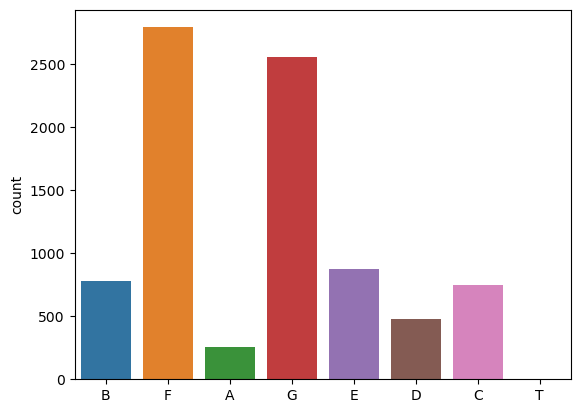

In [109]:
sns.countplot(x=cabin_deck)

<Axes: ylabel='Transported'>

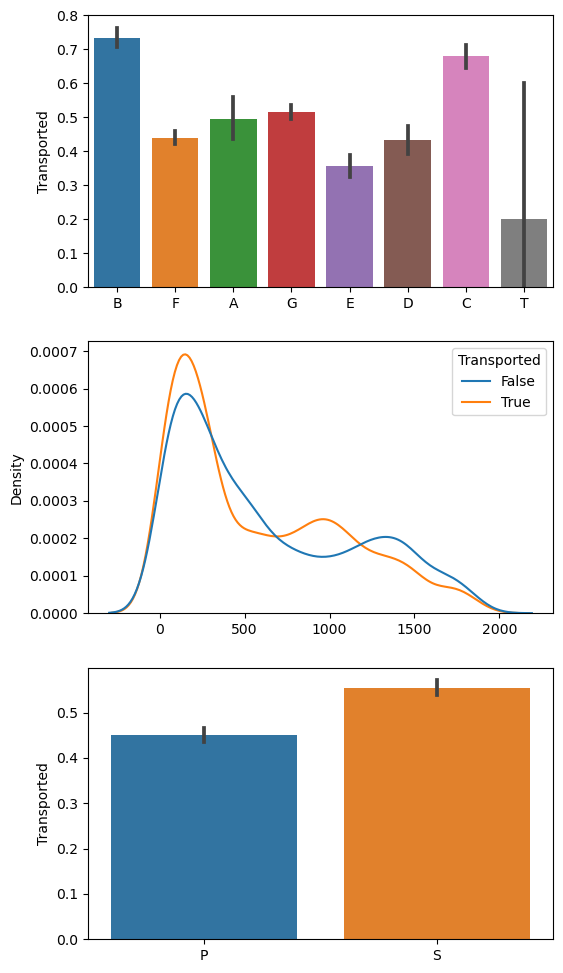

In [6]:
fig, axes = plt.subplots(3,1,figsize=(6,12))

sns.barplot(x=cabin_deck, y=train['Transported'], ax=axes[0])
sns.kdeplot(x=cabin_num, hue=train['Transported'], ax=axes[1])
sns.barplot(x=cabin_side, y=train['Transported'], ax=axes[2])

In [7]:
train['Cabin_Deck'] = cabin_deck
train['Cabin_Num'] = cabin_num
train['Cabin_Side'] = cabin_side

<Axes: xlabel='Cabin_Side', ylabel='Cabin_Num'>

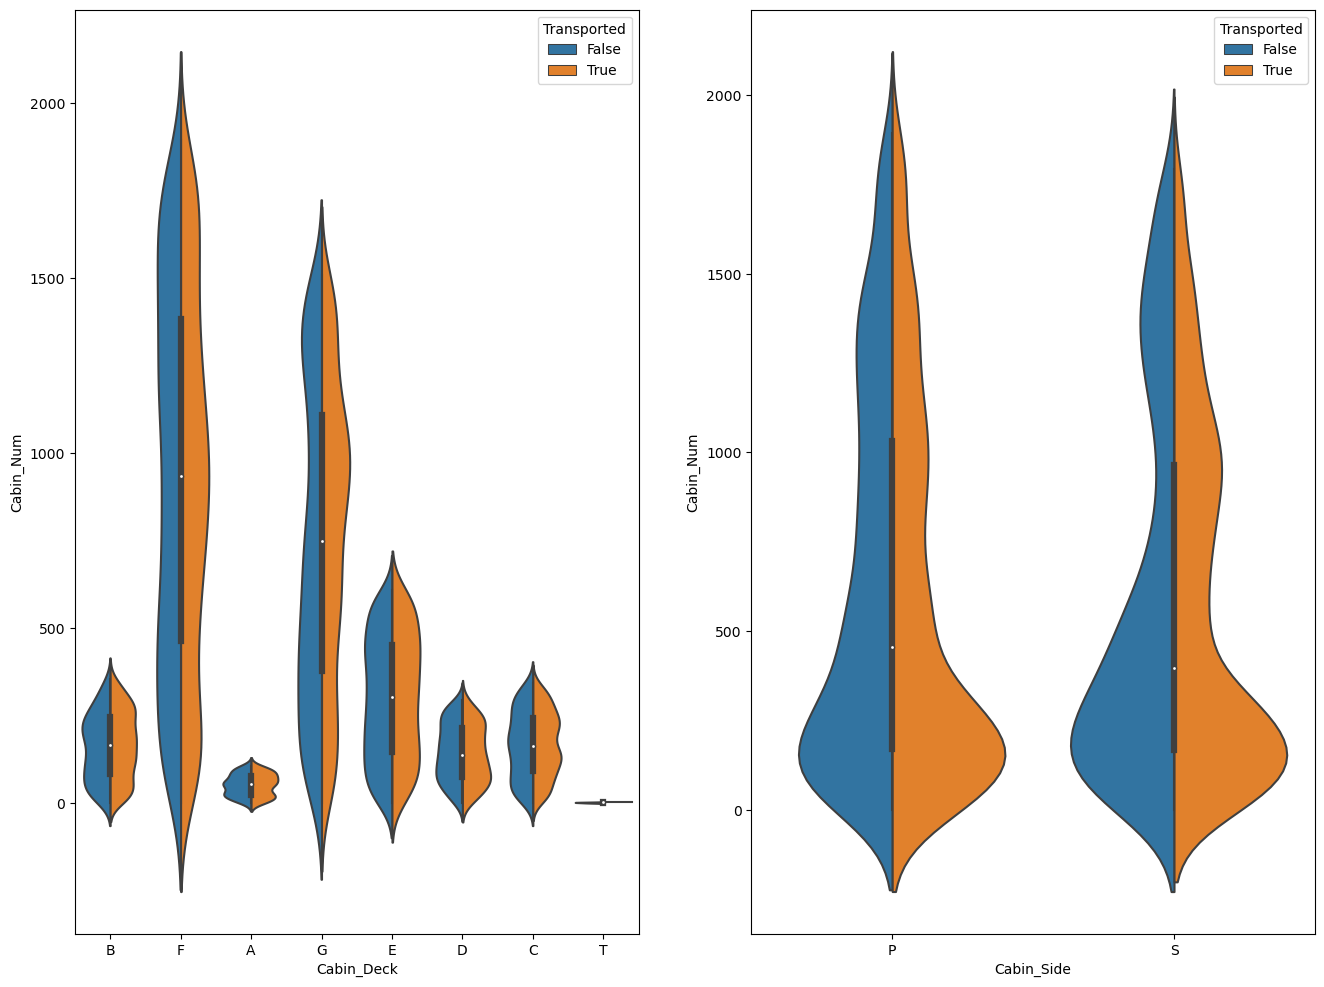

In [104]:
fig, (axes1, axes2) = plt.subplots(1,2, figsize=(16,12))

sns.violinplot(x='Cabin_Deck', y='Cabin_Num', hue='Transported', data=train, split=True, ax=axes1)
sns.violinplot(x='Cabin_Side', y='Cabin_Num', hue='Transported', data=train, split=True, ax=axes2)

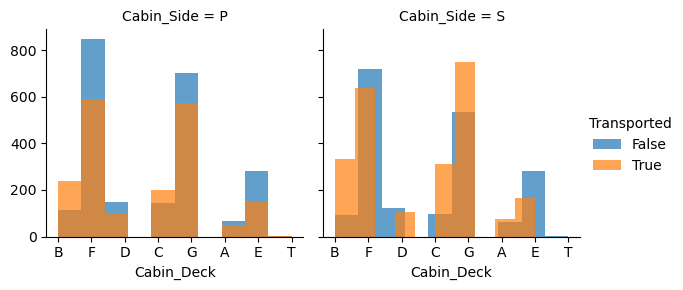

In [103]:
h = sns.FacetGrid(train, col='Cabin_Side', hue='Transported')
h.map(plt.hist, 'Cabin_Deck', alpha=0.7)
h.add_legend()

In [8]:
def extract(item):
    try:
        return item.split('_')[0]
    except:
        return None

group = [extract(item) for item in train['PassengerId']]

In [9]:
groupmates = {}

for i in group:
    if groupmates.get(i) is None:
        groupmates.update({i:0})
    else:
        groupmates[i] = groupmates.get(i) + 1

len(groupmates)

6217

In [10]:
train['Groupmates'] = [groupmates.get(item) for item in group]

<Axes: xlabel='Groupmates', ylabel='Transported'>

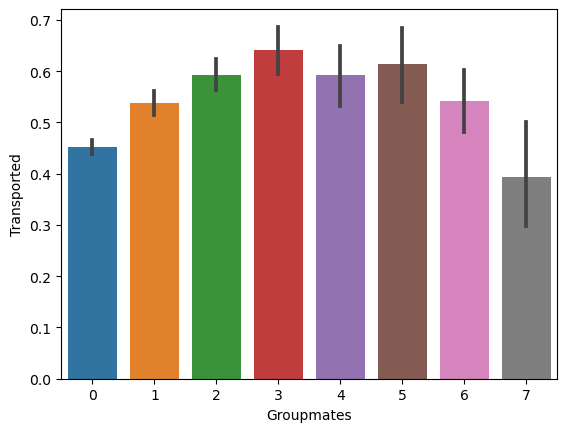

In [11]:
sns.barplot(x='Groupmates', y='Transported', data=train)

In [25]:
def extract_last_name(item):
    try:
        return item.split(' ')[1].strip()
    except:
        return None

last_names = [extract_last_name(name) for name in train['Name']]

In [26]:
def set_value(data, item):
    try:
        return data.get(item)
    except:
        return None

relatives = {}

for i in last_names:
    if i is None:
        continue
    elif relatives.get(i) is None:
        relatives.update({i:0})
    else:
        relatives[i] = relatives.get(i) + 1

train['Relatives'] = [set_value(relatives, item) for item in last_names]

<Axes: xlabel='Relatives', ylabel='Transported'>

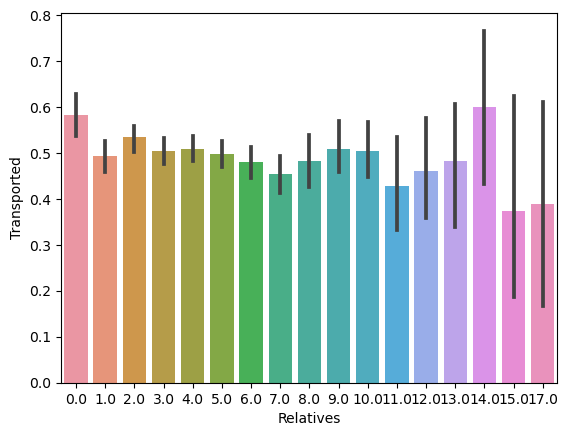

In [33]:
sns.barplot(x='Relatives', y='Transported', data=train)

In [39]:
train['No_Relatives'] = [1 if item==0 else 0 for item in train['Relatives']]
train['No_Group'] = [1 if item==0 else 0 for item in train['Groupmates']]

<Axes: xlabel='No_Group', ylabel='Transported'>

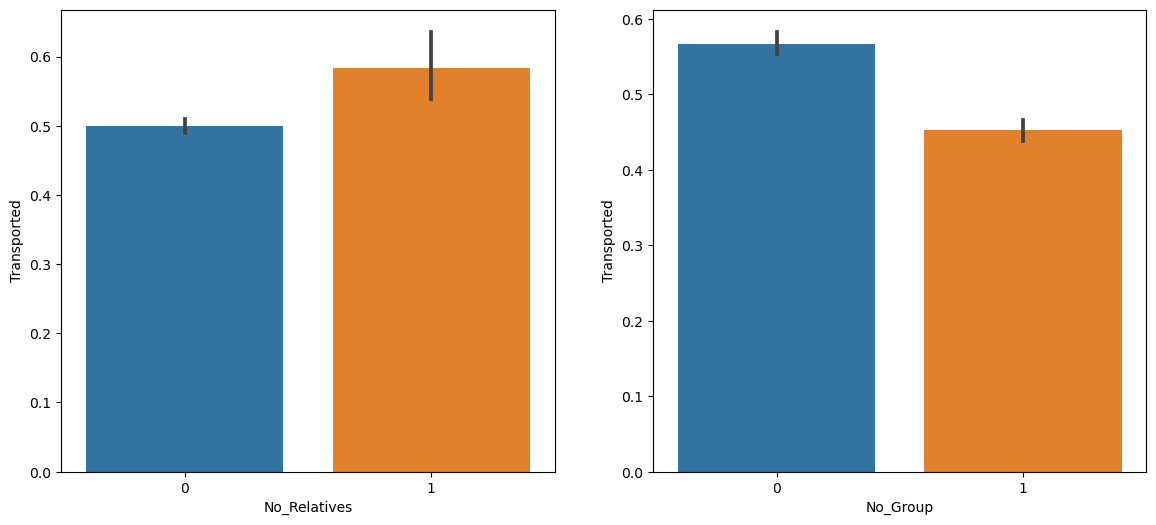

In [42]:
fig, (axes1,axes2) = plt.subplots(1,2, figsize=(14,6))

sns.barplot(x='No_Relatives', y='Transported', data=train, ax=axes1)
sns.barplot(x='No_Group', y='Transported', data=train, ax=axes2)

### Null Values

In [3]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [5]:
merged = pd.concat([train,test]).reset_index(drop=True)

In [6]:
merged.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [7]:
merged['HomePlanet'].fillna(merged['HomePlanet'].mode()[0], inplace=True)
merged['CryoSleep'].fillna(merged['CryoSleep'].mode()[0], inplace=True)
merged['Destination'].fillna(merged['Destination'].mode()[0], inplace=True)
merged['VIP'].fillna(False, inplace=True)

merged['Age'].fillna(merged['Age'].mean(), inplace=True)
merged['RoomService'].fillna(0.0, inplace=True)
merged['FoodCourt'].fillna(0.0, inplace=True)
merged['ShoppingMall'].fillna(0.0, inplace=True)
merged['Spa'].fillna(0.0, inplace=True)
merged['VRDeck'].fillna(0.0, inplace=True)

### Feature Engineering

In [8]:
def func(item, index):
    try:
        return item.split('/')[index] if index!=1 else int(item.split('/')[index])
    except:
        return None


merged['Cabin_Deck'] = [func(deck, 0) for deck in merged['Cabin']]
merged['Cabin_Num'] = [func(deck, 1) for deck in merged['Cabin']]
merged['Cabin_Side'] = [func(deck, 2) for deck in merged['Cabin']]

merged['Cabin_Deck'].fillna(merged['Cabin_Deck'].mode()[0], inplace=True)
merged.loc[merged['Cabin_Num'].isnull(),'Cabin_Num']=np.random.randint(0, 1894, size=merged['Cabin'].isnull().sum())
merged['Cabin_Side'].fillna(merged['Cabin_Side'].mode()[0], inplace=True)

In [9]:
def extract_last_name(item):
    try:
        return item.split(' ')[1].strip()
    except:
        return None

def set_value(data, item):
    try:
        return data.get(item)
    except:
        return None

    
last_names = [extract_last_name(name) for name in merged['Name']]

relatives = {}

for i in last_names:
    if i is None:
        continue
    elif relatives.get(i) is None:
        relatives.update({i:0})
    else:
        relatives[i] = relatives.get(i) + 1

merged['Relatives'] = [set_value(relatives, item) for item in last_names]
merged.loc[merged['Relatives'].isnull(),'Relatives']=np.random.randint(0, 17, size=merged['Relatives'].isnull().sum())

In [10]:
def extract(item):
    try:
        return item.split('_')[0]
    except:
        return None

group = [extract(item) for item in merged['PassengerId']]

groupmates = {}

for i in group:
    if groupmates.get(i) is None:
        groupmates.update({i:0})
    else:
        groupmates[i] = groupmates.get(i) + 1

merged['Groupmates'] = [groupmates.get(item) for item in group]

In [11]:
merged['No_Relatives'] = [1 if item==0 else 0 for item in merged['Relatives']]
merged['No_Group'] = [1 if item==0 else 0 for item in merged['Groupmates']]

merged['Age_bin'] = pd.qcut(merged.loc[:,'Age'], 10)
merged['Spa_bin'] = pd.cut(merged.loc[:,'Spa'], bins=(-0.1, 0.1, 100, 500, 1000, 3000, 5000, 15000, 25000))
merged['RoomService_bin'] = pd.cut(merged.loc[:,'RoomService'], bins=(-0.1, 0.1, 100, 500, 1000, 3000, 5000, 15000, 25000))
merged['ShoppingMall_bin'] = pd.cut(merged.loc[:,'ShoppingMall'], bins=(-0.1, 0.1, 100, 500, 1000, 3000, 5000, 15000, 25000))
merged['VRDeck_bin'] = pd.cut(merged.loc[:,'VRDeck'], bins=(-0.1, 0.1, 100, 500, 1000, 3000, 5000, 15000, 25000))
merged['FoodCourt_bin'] = pd.cut(merged.loc[:,'FoodCourt'], bins=(-0.1, 0.1, 100, 500, 1000, 3000, 5000, 15000, 30000))

merged['Spa_RS_VR'] = merged['Spa'] + merged['RoomService'] + merged['VRDeck']
merged['Food_SM'] = merged['FoodCourt'] + merged['ShoppingMall']

merged.drop(['Name', 'Cabin', 'PassengerId'], axis=1, inplace=True)

In [12]:
train = merged.iloc[:8693]
test = merged.iloc[8693:]

### try normalizing values with boxcox (not used)

In [13]:
from scipy.stats import boxcox

cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num', 'Relatives', 'Spa_RS_VR', 'Food_SM']

lambdas = []
for i in cols:
    train.loc[:,i], lambd = boxcox(train.loc[:,i]+1e-8)
    lambdas.append(lambd)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20772\2556308644.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Relatives'] , fit=norm, color="b");


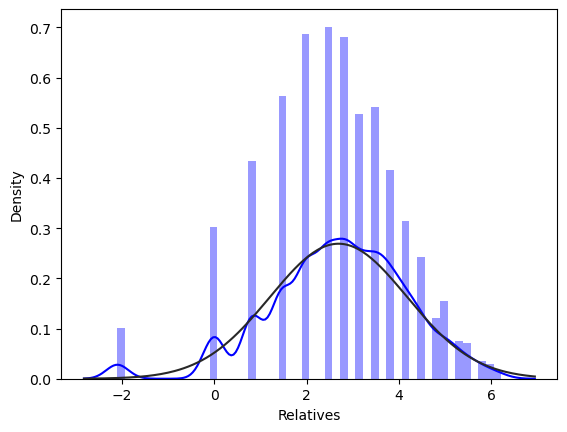

In [178]:
from scipy.stats import norm

sns.distplot(train['Relatives'] , fit=norm, color="b");

### scaling

In [13]:
pipeline = Pipeline([
    ('robust_scaler', RobustScaler()),
    ('min_max_scaler', MinMaxScaler())
])

pipeline.fit(train.loc[:, ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num', 'Relatives', 'Spa_RS_VR', 'Food_SM']])
train.loc[:, ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num', 'Relatives', 'Spa_RS_VR', 'Food_SM']] = pipeline.transform(train.loc[:, ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num', 'Relatives', 'Spa_RS_VR', 'Food_SM']])

with open('pipeline.pkl','wb') as f:
    dump(pipeline, f)

train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Num,Cabin_Side,Relatives,Groupmates,No_Relatives,No_Group,Age_bin,Spa_bin,RoomService_bin,ShoppingMall_bin,VRDeck_bin,FoodCourt_bin,Spa_RS_VR,Food_SM
0,Europa,False,TRAPPIST-1e,0.493671,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,B,0.000000,P,0.111111,0,0,1,"(35.0, 40.0]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]",0.000000,0.000000
1,Earth,False,TRAPPIST-1e,0.303797,False,0.007608,0.000302,0.001064,0.024500,0.001823,True,F,0.000000,S,0.166667,0,0,1,"(21.0, 24.0]","(500.0, 1000.0]","(100.0, 500.0]","(0.1, 100.0]","(0.1, 100.0]","(0.1, 100.0]",0.024545,0.001140
2,Europa,False,TRAPPIST-1e,0.734177,True,0.003001,0.119948,0.000000,0.299670,0.002030,False,A,0.000000,S,0.333333,1,0,0,"(49.0, 79.0]","(5000.0, 15000.0]","(0.1, 100.0]","(-0.1, 0.1]","(0.1, 100.0]","(3000.0, 5000.0]",0.238007,0.119948
3,Europa,False,TRAPPIST-1e,0.417722,False,0.000000,0.043035,0.015793,0.148563,0.007997,False,A,0.000000,S,0.333333,1,0,0,"(30.0, 35.0]","(3000.0, 5000.0]","(-0.1, 0.1]","(100.0, 500.0]","(100.0, 500.0]","(1000.0, 3000.0]",0.123147,0.055479
4,Earth,False,TRAPPIST-1e,0.202532,False,0.021149,0.002348,0.006428,0.025214,0.000083,True,F,0.000528,S,0.444444,0,0,1,"(13.0, 18.0]","(500.0, 1000.0]","(100.0, 500.0]","(100.0, 500.0]","(0.1, 100.0]","(0.1, 100.0]",0.030420,0.007413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,0.518987,True,0.000000,0.228726,0.000000,0.073322,0.003066,False,A,0.051742,P,0.111111,0,0,1,"(40.0, 49.0]","(1000.0, 3000.0]","(-0.1, 0.1]","(-0.1, 0.1]","(0.1, 100.0]","(5000.0, 15000.0]",0.060035,0.228726
8689,Earth,True,PSO J318.5-22,0.227848,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,G,0.791447,S,0.222222,0,0,1,"(13.0, 18.0]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]",0.000000,0.000000
8690,Earth,False,TRAPPIST-1e,0.329114,False,0.000000,0.000000,0.079687,0.000045,0.000000,True,G,0.791975,S,0.388889,0,0,1,"(24.0, 27.0]","(0.1, 100.0]","(-0.1, 0.1]","(1000.0, 3000.0]","(-0.1, 0.1]","(-0.1, 0.1]",0.000035,0.062791
8691,Europa,False,55 Cancri e,0.405063,False,0.000000,0.035186,0.000000,0.015753,0.134049,False,E,0.321014,S,0.333333,1,0,0,"(30.0, 35.0]","(100.0, 500.0]","(-0.1, 0.1]","(-0.1, 0.1]","(3000.0, 5000.0]","(1000.0, 3000.0]",0.125455,0.035186


In [14]:
from pickle import load

with open('pipeline.pkl','rb') as f:
    test_pipeline = load(f)

test.loc[:, ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num', 'Relatives', 'Spa_RS_VR', 'Food_SM']] = test_pipeline.transform(test.loc[:, ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num', 'Relatives', 'Spa_RS_VR', 'Food_SM']])

test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Num,Cabin_Side,Relatives,Groupmates,No_Relatives,No_Group,Age_bin,Spa_bin,RoomService_bin,ShoppingMall_bin,VRDeck_bin,FoodCourt_bin,Spa_RS_VR,Food_SM
8693,Earth,True,TRAPPIST-1e,0.341772,False,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,G,0.001584,S,0.388889,0,0,1,"(24.0, 27.0]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]",0.000000,0.000000
8694,Earth,False,TRAPPIST-1e,0.240506,False,0.000000,0.000302,0.000000,0.125982,0.000000,NaN,F,0.002112,S,0.166667,0,0,1,"(18.0, 21.0]","(1000.0, 3000.0]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]","(0.1, 100.0]",0.098706,0.000302
8695,Europa,True,55 Cancri e,0.392405,False,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,C,0.000000,S,0.277778,0,0,1,"(30.0, 35.0]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]",0.000000,0.000000
8696,Europa,False,TRAPPIST-1e,0.481013,False,0.000000,0.223124,0.000000,0.008077,0.024241,NaN,C,0.000528,S,0.055556,0,0,1,"(35.0, 40.0]","(100.0, 500.0]","(-0.1, 0.1]","(-0.1, 0.1]","(500.0, 1000.0]","(5000.0, 15000.0]",0.026783,0.223124
8697,Earth,False,TRAPPIST-1e,0.253165,False,0.000698,0.000000,0.027030,0.000000,0.000000,NaN,F,0.002640,S,0.222222,0,0,1,"(18.0, 21.0]","(-0.1, 0.1]","(0.1, 100.0]","(500.0, 1000.0]","(-0.1, 0.1]","(-0.1, 0.1]",0.000350,0.021299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,0.430380,False,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,G,0.789863,S,0.500000,1,0,0,"(30.0, 35.0]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]",0.000000,0.000000
12966,Earth,False,TRAPPIST-1e,0.531646,False,0.000000,0.028410,0.000724,0.000446,0.005967,NaN,F,0.355333,S,0.277778,0,0,1,"(40.0, 49.0]","(0.1, 100.0]","(-0.1, 0.1]","(0.1, 100.0]","(100.0, 500.0]","(500.0, 1000.0]",0.005385,0.028981
12967,Mars,True,55 Cancri e,0.364202,False,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,D,0.156283,P,0.166667,0,0,1,"(27.0, 30.0]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]",0.000000,0.000000
12968,Europa,False,TRAPPIST-1e,0.364202,False,0.000000,0.089894,0.000000,0.000000,0.021672,NaN,D,0.156811,P,0.333333,0,0,1,"(27.0, 30.0]","(-0.1, 0.1]","(-0.1, 0.1]","(-0.1, 0.1]","(500.0, 1000.0]","(1000.0, 3000.0]",0.018287,0.089894


In [15]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
merged['Spa_bin'] = label.fit_transform(merged['Spa_bin'])
merged['Age_bin'] = label.fit_transform(merged['Age_bin'])
merged['RoomService_bin'] = label.fit_transform(merged['RoomService_bin'])
merged['ShoppingMall_bin'] = label.fit_transform(merged['ShoppingMall_bin']) 
merged['VRDeck_bin'] = label.fit_transform(merged['VRDeck_bin']) 
merged['FoodCourt_bin'] = label.fit_transform(merged['FoodCourt_bin'])
merged = pd.get_dummies(merged, columns = ['HomePlanet', 'Destination','Cabin_Deck','Cabin_Side', 'Spa_bin', 'Age_bin', 'RoomService_bin', 'ShoppingMall_bin', 'VRDeck_bin', 'FoodCourt_bin'])

In [16]:
train = merged.iloc[:8693]
test = merged.iloc[8693:]

### Modelling

In [17]:
y_train = train.loc[:, 'Transported']
y_train = pd.DataFrame(y_train.astype('bool'))
x_train = train.drop('Transported', axis=1)

test = test.drop('Transported', axis=1)

In [ ]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import catboost as cb
import lightgbm as lgb

#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier(),
    
    cb.CatBoostClassifier(),
    lgb.LGBMClassifier()
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.StratifiedShuffleSplit(n_splits = 10, test_size = .2, train_size = .8, random_state = 42 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = y_train.copy()

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, x_train, y_train.values.ravel(), cv = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(x_train, y_train.values.ravel())
    MLA_predict.loc[:, MLA_name] = alg.predict(x_train)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

In [ ]:
# Testing CatBoost separately since it was not working in the previous code 

cat_boost = cb.CatBoostClassifier(loss_function='Logloss', custom_loss='Accuracy')
cv_results = cb.cv(
    cb.Pool(x_train, label=y_train),
    cat_boost.get_params(),
    fold_count=10,
    shuffle=True,
    stratified=True,
    early_stopping_rounds=20,
    verbose=False,
    plot=True
)

cv_results

### Fine-tuning with Optuna

In [18]:
# cheching fine-tuned accuracy with k-fold
def kfold_check(model, x, y):

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    acc = 0
    
    for train_index, test_index in cv.split(x,y):
        # Split the data into training and testing sets for this fold
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train a model on the training data
        model.fit(x_train, y_train)

        # Make predictions on the testing data
        y_pred = model.predict(x_test)

        # Calculate and print the mean squared error for this fold
        acc += accuracy_score(y_test, y_pred)
    
    print("Mean Accuracy:", acc/5)

#### LGBM

In [52]:
#https://towardsdatascience.com/kagglers-guide-to-lightgbm-hyperparameter-tuning-with-optuna-in-2021-ed048d9838b5

import lightgbm as lgb
import optuna  # pip install optuna
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold

from optuna.integration import LightGBMPruningCallback

def lgb_objective(trial, X, y):
    param_grid = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 9000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.6, 1, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.6, 1, step=0.1
        ),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgb.LGBMClassifier(objective="binary", **param_grid, random_state=42)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="binary_logloss",
            early_stopping_rounds=50,
#            callbacks=[
#                LightGBMPruningCallback(trial, "binary_logloss")
#            ],  # Add a pruning callback
        )
        preds = model.predict_proba(X_test)
        cv_scores[idx] = log_loss(y_test, preds)

    return np.mean(cv_scores)

In [ ]:
study = optuna.create_study(direction="minimize", study_name="LGBM Classifier")
func = lambda trial: lgb_objective(trial, x_train, np.ravel(y_train.values))
study.optimize(func, n_trials=300)

In [54]:
print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (rmse): 0.38729
	Best params:
		n_estimators: 10000
		learning_rate: 0.17758171590712873
		num_leaves: 220
		max_depth: 6
		min_data_in_leaf: 21
		lambda_l1: 0
		lambda_l2: 9
		min_gain_to_split: 0.012226309677158244
		bagging_fraction: 0.9
		bagging_freq: 1
		feature_fraction: 0.9


In [ ]:
#for LGBM need custom fit
lgb_model = lgb.LGBMClassifier(objective="binary", random_state=42)
lgb_model.set_params(**study.best_params)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = 0

for train_index, test_index in cv.split(x_train,y_train.values.ravel()):
    # Split the data into training and testing sets for this fold
    X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
    Y_train, Y_test = y_train.values.ravel()[train_index], y_train.values.ravel()[test_index]

    # Train a model on the training data
    lgb_model.fit(
        X_train,
        Y_train,
        eval_set=[(X_test, Y_test)],
        eval_metric="binary_logloss",
        early_stopping_rounds=50,
    )

    # Make predictions on the testing data
    y_pred = lgb_model.predict(X_test)

    # Calculate and print the mean squared error for this fold
    acc += accuracy_score(Y_test, y_pred)
    
print("Mean Accuracy:", acc/5)

#### SVC 

In [ ]:
#https://towardsdatascience.com/kagglers-guide-to-lightgbm-hyperparameter-tuning-with-optuna-in-2021-ed048d9838b5

import optuna  # pip install optuna
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold

def svc_objective(trial, X, y):
    param_grid = {
        'C':trial.suggest_float('C', 0.01, 70.0),
        'kernel':trial.suggest_categorical('kernel',['rbf']),
        'gamma':trial.suggest_float('gamma', 0.1, 10),
        #'degree': trial.suggest_int('degree', 2, 5, step=1)
    }
    
    train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=7, train_size=0.8, shuffle=True, stratify=y_train)
    
    model = svm.SVC(probability=True, **param_grid, random_state=42)
    model.fit(
        train_x,
        train_y,
    )
    
    preds = model.predict_proba(test_x)
    loss = log_loss(test_y, preds)

    return loss

study = optuna.create_study(direction="minimize", study_name="SVC Classifier")
func = lambda trial: svc_objective(trial, x_train, np.ravel(y_train.values))
study.optimize(func, n_trials=30)

print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
svc_model = svm.SVC(probability=True, random_state=42)
svc_model.set_params(**study.best_params)
kfold_check(svc_model, x_train, y_train.values.ravel())

#### XGB 

In [ ]:
#https://towardsdatascience.com/kagglers-guide-to-lightgbm-hyperparameter-tuning-with-optuna-in-2021-ed048d9838b5

import xgboost as xgb
import optuna  # pip install optuna
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold


def xgb_objective(trial, X, y):
    param_grid = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "eta": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_weight": trial.suggest_int("min_child_weight", 0, 10, step=1),
        "reg_lambda": trial.suggest_int("reg_lambda", 0, 20, step=2),
        "reg_alpha": trial.suggest_int("reg_alpha", 0, 20, step=2),
        "gamma": trial.suggest_int("gamma", 0, 10, step=1),
        "colsample_bytree": trial.suggest_float(
            "colsample_bytree", 0.6, 1, step=0.1
        ),
        "subsample": trial.suggest_float("subsample", 0.6, 1, step=0.1),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = xgb.XGBClassifier(objective='binary:logistic', **param_grid, seed=42, early_stopping_rounds=50, eval_metric="logloss", verbosity=0, n_jobs=4)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            verbose=False,
        )
        preds = model.predict_proba(X_test)
        cv_scores[idx] = log_loss(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="minimize", study_name="XGB Classifier")
func = lambda trial: xgb_objective(trial, x_train, np.ravel(y_train.values))
study.optimize(func, n_trials=150)

print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
xgb_model = xgb.XGBClassifier(objective='binary:logistic', seed=42, early_stopping_rounds=50, eval_metric="logloss", verbosity=0)
xgb_model.set_params(**study.best_params)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = 0

for train_index, test_index in cv.split(x_train,y_train.values.ravel()):
    # Split the data into training and testing sets for this fold
    X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
    Y_train, Y_test = y_train.values.ravel()[train_index], y_train.values.ravel()[test_index]

    # Train a model on the training data
    xgb_model.fit(
        X_train,
        Y_train,
        eval_set=[(X_test, Y_test)],
    )

    # Make predictions on the testing data
    y_pred = xgb_model.predict(X_test)

    # Calculate and print the mean squared error for this fold
    acc += accuracy_score(Y_test, y_pred)
    
print("Mean Accuracy:", acc/5)

#### Random Forest

In [ ]:
def rt_objective(trial, X, y):
    param_grid = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 700, step=50),
        #"criterion":trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"]),
        "min_samples_leaf":trial.suggest_int("min_samples_leaf", 2, 20, step=1),
        "min_samples_split":trial.suggest_int("min_samples_split", 2, 20, step=1),
        #"max_features":trial.suggest_categorical("max_features", ['sqrt','log2',None]),
        "max_leaf_nodes":trial.suggest_int("max_leaf_nodes", 20, 350, step=10),
        #"min_impurity_decrease":trial.suggest_float("min_impurity_decrease", 0.0, 0.2, step=0.005),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "max_samples": trial.suggest_float("max_samples", 0.6, 1, step=0.05)
    }

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    cv_scores = np.empty(3)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = ensemble.RandomForestClassifier(**param_grid ,random_state=42, n_jobs=4)
        model.fit(
            X_train,
            y_train,
        )
        preds = model.predict_proba(X_test)
        cv_scores[idx] = log_loss(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="minimize", study_name="RT Classifier")
func = lambda trial: rt_objective(trial, x_train, np.ravel(y_train.values))
study.optimize(func, n_trials=60)

print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
rt_model = ensemble.RandomForestClassifier(random_state=42)
rt_model.set_params(**study.best_params)
kfold_check(rt_model, x_train, y_train.values.ravel())

### LinearSVC

In [ ]:
#https://towardsdatascience.com/kagglers-guide-to-lightgbm-hyperparameter-tuning-with-optuna-in-2021-ed048d9838b5
from sklearn import svm
import optuna  # pip install optuna
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold

def linSVC_objective(trial, X, y):
    param_grid = {
        'C':trial.suggest_float('C', 0.01, 80.0),
        'dual': trial.suggest_categorical('dual',[False]),
        'max_iter': trial.suggest_int('max_iter', 500, 5000, step=100)
    }

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    cv_scores = np.empty(3)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = svm.LinearSVC(**param_grid, random_state=42)
        model.fit(
            X_train,
            y_train,
        )
        preds = model.predict(X_test)
        cv_scores[idx] = log_loss(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="minimize", study_name="SVC Classifier")
func = lambda trial: linSVC_objective(trial, x_train, np.ravel(y_train.values))
study.optimize(func, n_trials=50)

print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
linSVC_model = svm.LinearSVC(random_state=42)
linSVC_model.set_params(**study.best_params)
kfold_check(linSVC_model, x_train, y_train.values.ravel())

#### LogisticRegression

In [ ]:
def log_objective(trial, X, y):
    param_grid = {
        'C':trial.suggest_float('C', 0.01, 80.0),
        'penalty':trial.suggest_categorical('penalty',['l1', 'l2']),
        'max_iter':trial.suggest_int('max_iter', 100, 3000, step=50),
        'solver':trial.suggest_categorical('solver', ['liblinear'])
    }

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    cv_scores = np.empty(3)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = LogisticRegression(**param_grid, random_state=42, n_jobs=4)
        model.fit(
            X_train,
            y_train,
        )
        preds = model.predict_proba(X_test)
        cv_scores[idx] = log_loss(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="minimize", study_name="LogReg Classifier")
func = lambda trial: log_objective(trial, x_train, np.ravel(y_train.values))
study.optimize(func, n_trials=100)

print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
log_model = LogisticRegression(random_state=42)
log_model.set_params(**study.best_params)
kfold_check(log_model, x_train, y_train.values.ravel())

#[I 2023-07-15 18:25:52,523] Trial 64 finished with value: 0.4362286438230519 and parameters: {'C': 51.40888258322043, 'penalty': 'l2', 'max_iter': 1050}. Best is trial 64 with value: 0.4362286438230519.

#### CatBoost

In [ ]:
def cb_objective(trial, X, y):
    param_grid = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        "iterations": trial.suggest_categorical("iterations", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "depth": trial.suggest_int("max_depth", 3, 12),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 300, step=1),
        "l2_leaf_reg": trial.suggest_int("l2_leaf_reg", 0, 20, step=1),
        "colsample_bylevel": trial.suggest_float(
            "colsample_bylevel", 0.6, 1, step=0.1
        ),
        "subsample": trial.suggest_float("subsample", 0.6, 1, step=0.1),
        "random_strength": trial.suggest_float("random_strength", 0, 1, step=0.1),
        "grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree"]),
        "bagging_temperature": trial.suggest_float('bagging_temperature', 0, 20, step=0.25)
    }

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    cv_scores = np.empty(3)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = cb.CatBoostClassifier(
                              **param_grid,
                              loss_function='Logloss',
                              random_seed=42,
                              early_stopping_rounds=50
                              )
 
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            verbose=False,
        )
        preds = model.predict_proba(X_test)
        cv_scores[idx] = log_loss(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="minimize", study_name="CB Classifier")
func = lambda trial: cb_objective(trial, x_train, np.ravel(y_train.values))
study.optimize(func, n_trials=100)

print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
cb_model = cb.CatBoostClassifier(
                              loss_function='Logloss',
                              random_seed=42,
                              early_stopping_rounds=50
                              )
 
cb_model.set_params(**study.best_params)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = 0

for train_index, test_index in cv.split(x_train,y_train.values.ravel()):
    # Split the data into training and testing sets for this fold
    X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
    Y_train, Y_test = y_train.values.ravel()[train_index], y_train.values.ravel()[test_index]

    # Train a model on the training data
    cb_model.fit(
        X_train,
        Y_train,
        eval_set=[(X_test, Y_test)],
    )

    y_pred = [True if item=='True' else False for item in cb_model.predict(X_test)]

    # Calculate and print the mean squared error for this fold
    acc += accuracy_score(Y_test, y_pred)
    
print("Mean Accuracy:", acc/5)
#0.38583

### Checking accuracy on test sets

In [18]:
train_x, val_x, train_y, val_y = train_test_split(x_train, y_train, random_state=7, train_size=0.8, shuffle=True, stratify=y_train)

In [ ]:
# Firstly fitting the model with fine-tuned parameters with validation set to find the n_estimators, then fitting on whole dataset

lgb_model = lgb.LGBMClassifier(objective="binary", 
                               n_estimators=10000,
                               learning_rate=0.16663154196500143,
                               num_leaves=1720,
                               max_depth=8,
                               min_data_in_leaf=200,
                               lambda_l1=0,
                               lambda_l2=0,
                               min_gain_to_split=0.9148109554766264,
                               bagging_fraction=1.0,
                               bagging_freq=1,
                               feature_fraction=1.0,
                               random_state=42)
lgb_model.fit(
        train_x,
        train_y,
        eval_set=[(val_x, val_y)],
        eval_metric="binary_logloss",
        early_stopping_rounds=50
        )

In [ ]:
lgb_model = lgb.LGBMClassifier(objective="binary", 
                               n_estimators=47,
                               learning_rate=0.16663154196500143,
                               num_leaves=1720,
                               max_depth=8,
                               min_data_in_leaf=200,
                               lambda_l1=0,
                               lambda_l2=0,
                               min_gain_to_split=0.9148109554766264,
                               bagging_fraction=1.0,
                               bagging_freq=1,
                               feature_fraction=1.0,
                               random_state=42)
lgb_model.fit(
        x_train,
        y_train,
        )

lgb_preds = lgb_model.predict(test)

submission = pd.read_csv(r"C:\Users\DELL\Downloads\spaceship-titanic\sample_submission.csv")[['PassengerId']]
submission['Transported'] = lgb_preds

submission.to_csv('titanic2_lgb.csv', index=False)

MLA_predict = pd.DataFrame(lgb_preds, columns=['LGBM']).copy()

In [ ]:
# Firstly fitting the model with fine-tuned parameters with validation set to find the n_estimators, then fitting on whole dataset

xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                          n_estimators=10000,
                          learning_rate=0.0633323745893168,
                          max_depth=9,
                          min_child_weight=0,
                          reg_lambda=0,
                          reg_alpha=0,
                          gamma=7,
                          colsample_bytree=1.0,
                          subsample=0.9,
                          seed=42, 
                          early_stopping_rounds=50, 
                          eval_metric="logloss", 
                          n_jobs=4)
xgb_model.fit(
      train_x,
      train_y,
      eval_set=[(val_x, val_y)],
      )

In [52]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                          n_estimators=154,
                          learning_rate=0.0633323745893168,
                          max_depth=9,
                          min_child_weight=0,
                          reg_lambda=0,
                          reg_alpha=0,
                          gamma=7,
                          colsample_bytree=1.0,
                          subsample=0.9,
                          seed=42, 
                          n_jobs=4)
xgb_model.fit(
      x_train,
      y_train,
      )

xgb_preds = [bool(item) for item in xgb_model.predict(test)]

submission = pd.read_csv(r"C:\Users\DELL\Downloads\spaceship-titanic\sample_submission.csv")[['PassengerId']]
submission['Transported'] = xgb_preds

submission.to_csv('titanic2_xgb.csv', index=False)

MLA_predict.loc[:, 'XGB'] = xgb_preds 

In [ ]:
# it turned out that default model was better than found parameters

cb_model = cb.CatBoostClassifier()

'''
iterations=320,
learning_rate=0.032143124243026844, 
max_depth=7,
# min_data_in_leaf=6850,
loss_function='Logloss',
random_seed=42,
l2_leaf_reg=9,
colsample_bylevel=0.7,
subsample=0.7,
random_strength=0.4,
leaf_estimation_method='Newton',
early_stopping_rounds=50
'''

cb_model.fit(
        x_train,
        y_train,
)


cb_preds = [True if item=='True' else False for item in cb_model.predict(test)]

submission = pd.read_csv(r"C:\Users\DELL\Downloads\spaceship-titanic\sample_submission.csv")[['PassengerId']]
submission['Transported'] = cb_preds

submission.to_csv('titanic2_cb.csv', index=False)

MLA_predict.loc[:, 'CB'] = cb_preds 

In [28]:
rf_model = ensemble.RandomForestClassifier(n_estimators=500, min_samples_leaf=3, min_samples_split=12, 
                                        max_leaf_nodes=80, max_depth=7, max_samples=0.9, random_state=42, n_jobs=4)

rf_model.fit(
      x_train,
      y_train.values.ravel(),
)

rf_preds = rf_model.predict(test)

submission = pd.read_csv(r"C:\Users\DELL\Downloads\spaceship-titanic\sample_submission.csv")[['PassengerId']]
submission['Transported'] = rf_preds

submission.to_csv('titanic2_RF.csv', index=False)

MLA_predict.loc[:, 'RandomForest'] = rf_preds 

In [29]:
linSVC_model = svm.LinearSVC(C=16.083866571689256, dual=False, max_iter=3700, random_state=42)

linSVC_model.fit(
    x_train,
    y_train.values.ravel()
)

linSVC_preds = linSVC_model.predict(test)

submission = pd.read_csv(r"C:\Users\DELL\Downloads\spaceship-titanic\sample_submission.csv")[['PassengerId']]
submission['Transported'] = linSVC_preds

submission.to_csv('titanic2_linSVC.csv', index=False)

MLA_predict.loc[:, 'Lin SVC'] = linSVC_preds          

In [30]:
SVC_model = svm.SVC(C=3.866404406035201, kernel='rbf', gamma=0.1260645816435799, probability=True, random_state=42)

SVC_model.fit(
    x_train,
    y_train.values.ravel()
)

SVC_preds = linSVC_model.predict(test)

submission = pd.read_csv(r"C:\Users\DELL\Downloads\spaceship-titanic\sample_submission.csv")[['PassengerId']]
submission['Transported'] = SVC_preds

submission.to_csv('titanic2_SVC.csv', index=False)

MLA_predict.loc[:, 'SVC'] = SVC_preds

In [31]:
lr_model = LogisticRegression(C=51.40888258322043, penalty='l2', max_iter=1050, random_state=42, n_jobs=4)

lr_model.fit(
    x_train,
    y_train.values.ravel()
    )

lr_preds = lr_model.predict(test)

submission = pd.read_csv(r"C:\Users\DELL\Downloads\spaceship-titanic\sample_submission.csv")[['PassengerId']]
submission['Transported'] = lr_preds

submission.to_csv('titanic2_LR.csv', index=False)

MLA_predict.loc[:, 'Log Reg'] = lr_preds 

In [32]:
MLA_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LGBM          4277 non-null   bool 
 1   XGB           4277 non-null   bool 
 2   CB            4277 non-null   bool 
 3   RandomForest  4277 non-null   bool 
 4   Lin SVC       4277 non-null   bool 
 5   SVC           4277 non-null   bool 
 6   Log Reg       4277 non-null   bool 
dtypes: bool(7)
memory usage: 29.4 KB


In [ ]:
xgb_model.save_model('best_xgb_classifier.json')
with open('best_xgb_classifier.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

cb_model.save_model('best_cb_classifier')

lgb_model.booster_.save_model('best_lgb_classifier.txt', num_iteration=47)
with open('best_lgb_classifier.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)

with open('best_RF_classifier.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
with open('best_SVC_classifier.pkl', 'wb') as file:
    pickle.dump(SVC_model, file)
with open('best_LinearSVC_classifier.pkl', 'wb') as file:
    pickle.dump(linSVC_model, file)
with open('best_LogReg_classifier.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

### Ensembling

#### Seeing the correlation between models for further experiments

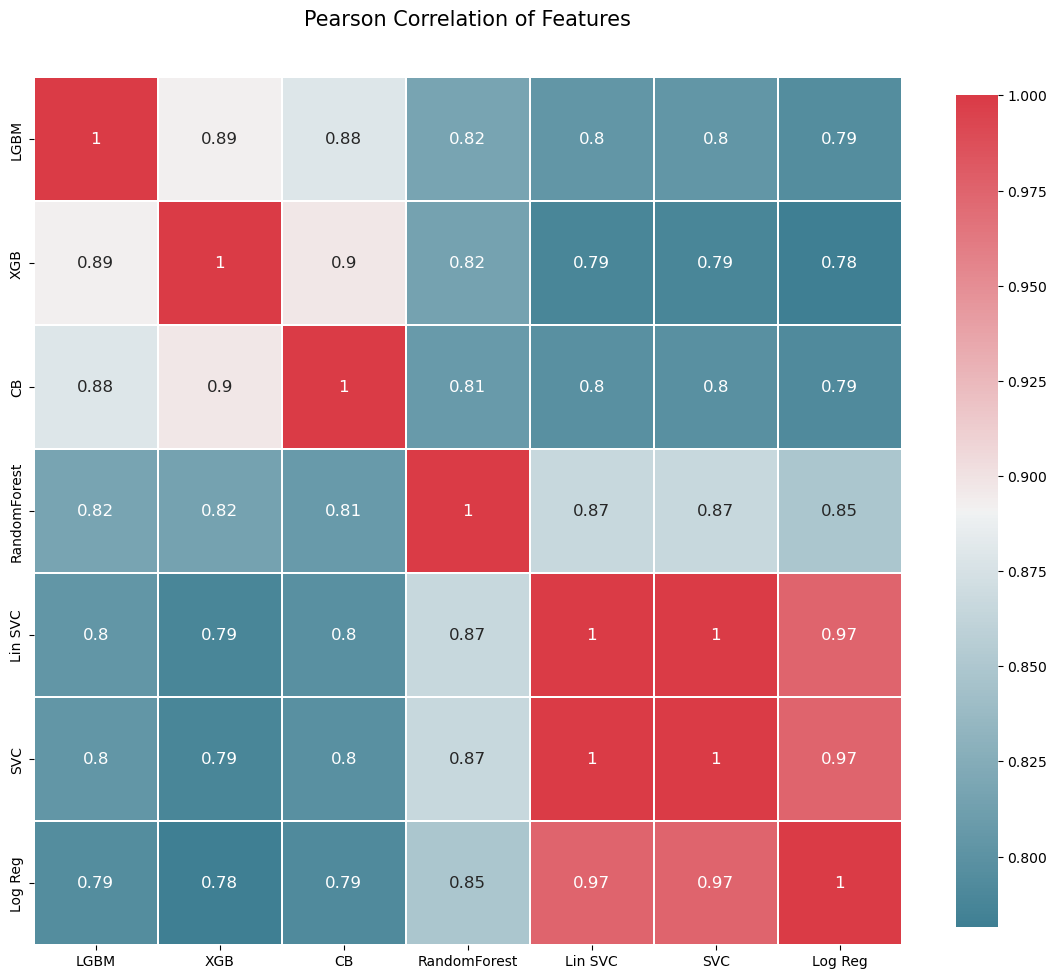

In [38]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(MLA_predict)

#### Load Models

In [33]:
#xgb_model = xgb.Booster()
#xgb_model.load_model('best_xgb_classifier.json')

cb_model = cb.CatBoostClassifier()
cb_model.load_model('best_cb_classifier')

#lgb_model = lgb.Booster(model_file='best_lgb_classifier.txt')

with open('best_xgb_classifier.pkl', 'rb') as file:
    xgb_model = pickle.load(file)

with open('best_lgb_classifier.pkl', 'rb') as file:
    lgb_model = pickle.load(file)

with open('best_RF_classifier.pkl', 'rb') as file:
    rf_model = pickle.load(file)
    
with open('best_SVC_classifier.pkl', 'rb') as file:
    SVC_model = pickle.load(file)
    
with open('best_LinearSVC_classifier.pkl', 'rb') as file:
    linSVC_model = pickle.load(file)
    
with open('best_LogReg_classifier.pkl', 'rb') as file:
    lr_model = pickle.load(file)

#### Soft voting fot highly correlated models (THE BETTER WAY IS TO PREDICT ON TEST SET, SAVE TO PANDAS? AND THEN MAKE OPERATIONS ON IT in order not to predict each time)

In [39]:
preds = []
for i in range(len(test)):
    xgb_prob = xgb_model.predict_proba(test.iloc[[i]])
    cat_prob = cb_model.predict_proba(test.iloc[[i]])
    lgb_prob = lgb_model.predict_proba(test.iloc[[i]])
    
    preds.append(np.argmax((xgb_prob+cat_prob+lgb_prob)/3))
    
submission = pd.read_csv(r"C:\Users\DELL\Downloads\spaceship-titanic\sample_submission.csv")[['PassengerId']]
submission['Transported'] = [True if item==1 else False for item in preds]

submission.to_csv('titanic2_soft_XGB+CB+LGB.csv', index=False)

#### Hard Voting for highly correlated models

In [ ]:
preds = []
for i in range(len(test)):
    xgb_prob = xgb_model.predict(test.iloc[[i]])
    cat_prob = bool(cb_model.predict(test.iloc[[i]]))
    lgb_prob = lgb_model.predict(test.iloc[[i]])
    
    preds.append(bool(round(((xgb_prob+cat_prob+lgb_prob)/3)[0])))
    
submission = pd.read_csv(r"C:\Users\DELL\Downloads\spaceship-titanic\sample_submission.csv")[['PassengerId']]
submission['Transported'] = [True if item==1 else False for item in preds]

submission.to_csv('titanic2_hard_XGB+CB+LGB.csv', index=False)

#### Soft voting for uncorrelated models

In [48]:
preds = []
for i in range(len(test)):
    xgb_prob = xgb_model.predict_proba(test.iloc[[i]])
    svc_prob = SVC_model.predict_proba(test.iloc[[i]])
    lr_prob = lr_model.predict_proba(test.iloc[[i]])
    
    preds.append(np.argmax((xgb_prob+svc_prob+lr_prob)/3))
    
submission = pd.read_csv(r"C:\Users\DELL\Downloads\spaceship-titanic\sample_submission.csv")[['PassengerId']]
submission['Transported'] = [True if item==1 else False for item in preds]

submission.to_csv('titanic2_soft_XGB+SVC+LR.csv', index=False)

#### Soft voting with weights

In [30]:
#with weights

preds = []
for i in range(len(test)):
    xgb_prob = xgb_model.predict_proba(test.iloc[[i]])
    svc_prob = SVC_model.predict_proba(test.iloc[[i]])
    rf_prob = rf_model.predict_proba(test.iloc[[i]])
    
    preds.append(np.argmax((3*xgb_prob+svc_prob+rf_prob)/5))
    
submission = pd.read_csv(r"C:\Users\DELL\Downloads\spaceship-titanic\sample_submission.csv")[['PassengerId']]
submission['Transported'] = [True if item==1 else False for item in preds]

submission.to_csv('titanic2_soft_3XGB+SVC+RF.csv', index=False)

#### Because of limited number of submission, better to test models on the portion of train set

In [51]:
#It is smarter(not sure) to check the models on some cross-validation I guess
no_need1, test_x, no_need2, test_y = train_test_split(x_train, y_train.values.ravel(), random_state=42, train_size=0.6, shuffle=True, stratify=y_train)

0.8559516963772283


In [58]:
preds = []
for i in range(len(test_x)):
    xgb_prob = xgb_model.predict_proba(test_x.iloc[[i]])
    svc_prob = SVC_model.predict_proba(test_x.iloc[[i]])
    rf_prob = rf_model.predict_proba(test_x.iloc[[i]])
    
    preds.append(np.argmax((2*xgb_prob+svc_prob+rf_prob)/3))
    
print(accuracy_score(test_y, preds))

0.8709028177113284


3*xgb_prob+svc_prob+lr_prob+rf_prob = 0.8559516963772283  
3*xgb_prob+svc_prob+lr_prob = 0.8651523864289822  
3*xgb_prob+svc_prob+rf_prob = 0.8714778608395629  
3*cb_prob+svc_prob+rf_prob = 0.8838412880966072  
2*cb_prob+svc_prob+rf_prob = 0.8809660724554341

#### Stacking

In [ ]:
#https://github.com/emanuele/kaggle_pbr/blob/master/blend.py based on this

xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                          n_estimators=154,
                          learning_rate=0.0633323745893168,
                          max_depth=9,
                          min_child_weight=0,
                          reg_lambda=0,
                          reg_alpha=0,
                          gamma=7,
                          colsample_bytree=1.0,
                          subsample=0.9,
                          seed=42, 
                          n_jobs=4)

cb_model = cb.CatBoostClassifier()

lgb_model = lgb.LGBMClassifier(objective="binary", 
                               n_estimators=10000,
                               learning_rate=0.16663154196500143,
                               num_leaves=1720,
                               max_depth=8,
                               min_data_in_leaf=200,
                               lambda_l1=0,
                               lambda_l2=0,
                               min_gain_to_split=0.9148109554766264,
                               bagging_fraction=1.0,
                               bagging_freq=1,
                               feature_fraction=1.0,
                               random_state=42)

rf_model = ensemble.RandomForestClassifier(n_estimators=500, min_samples_leaf=3, min_samples_split=12, 
                                        max_leaf_nodes=80, max_depth=7, max_samples=0.9, random_state=42, n_jobs=4)

SVC_model = svm.SVC(C=3.866404406035201, kernel='rbf', gamma=0.1260645816435799, probability=True, random_state=42)

lr_model = LogisticRegression(C=51.40888258322043, penalty='l2', max_iter=1050, random_state=42, n_jobs=4)


num_splits = 10

models = [xgb_model, cb_model, lgb_model, SVC_model, rf_model, lr_model]

cv = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)
acc = 0
    
fl_preds = np.empty((x_train.shape[0], len(models)))
fl_preds_test = np.empty((test.shape[0], len(models)))

for i, model in enumerate(models):

    fl_preds_test_k = np.empty((test.shape[0], num_splits))
    
    for j, (train_index, test_index) in enumerate(cv.split(x_train,y_train.values.ravel())):
        # Split the data into training and testing sets for this fold
        train_x, test_x = x_train.iloc[train_index], x_train.iloc[test_index]
        train_y, test_y = y_train.values.ravel()[train_index], y_train.values.ravel()[test_index]

        model.fit(train_x, train_y)
        predict = model.predict_proba(test_x)[:,1]
        
        fl_preds[test_index, i] = predict
        fl_preds_test_k[:, j] = model.predict_proba(test)[:,1]
    
    fl_preds_test[:, i] = fl_preds_test_k.mean(axis=1)

print(fl_preds)
print(fl_preds_test)
    
meta = linear_model.LogisticRegression(random_state=42)
meta.fit(fl_preds, y_train.values.ravel())

preds = meta.predict_proba(fl_preds_test)[:,1]

preds = (preds - preds.min()) / (preds.max() - preds.min())

submission = pd.read_csv(r"C:\Users\DELL\Downloads\spaceship-titanic\sample_submission.csv")[['PassengerId']]
submission['Transported'] = [True if item>0.5 else False for item in preds]

submission.to_csv('titanic2_stacking.csv', index=False)             

In [ ]:
# with catboost as meta model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                          n_estimators=154,
                          learning_rate=0.0633323745893168,
                          max_depth=9,
                          min_child_weight=0,
                          reg_lambda=0,
                          reg_alpha=0,
                          gamma=7,
                          colsample_bytree=1.0,
                          subsample=0.9,
                          seed=42, 
                          n_jobs=4)

cb_model = cb.CatBoostClassifier(random_state=42)

lgb_model = lgb.LGBMClassifier(objective="binary", 
                               n_estimators=10000,
                               learning_rate=0.16663154196500143,
                               num_leaves=1720,
                               max_depth=8,
                               min_data_in_leaf=200,
                               lambda_l1=0,
                               lambda_l2=0,
                               min_gain_to_split=0.9148109554766264,
                               bagging_fraction=1.0,
                               bagging_freq=1,
                               feature_fraction=1.0,
                               random_state=42)

rf_model = ensemble.RandomForestClassifier(n_estimators=500, min_samples_leaf=3, min_samples_split=12, 
                                        max_leaf_nodes=80, max_depth=7, max_samples=0.9, random_state=42, n_jobs=4)

SVC_model = svm.SVC(C=3.866404406035201, kernel='rbf', gamma=0.1260645816435799, probability=True, random_state=42)

lr_model = LogisticRegression(C=51.40888258322043, penalty='l2', max_iter=1050, random_state=42, n_jobs=4)


num_splits = 10

models = [xgb_model, cb_model, lgb_model, SVC_model, rf_model, lr_model]

cv = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)
acc = 0
    
fl_preds = np.empty((x_train.shape[0], len(models)))
fl_preds_test = np.empty((test.shape[0], len(models)))

for i, model in enumerate(models):

    fl_preds_test_k = np.empty((test.shape[0], num_splits))
    
    for j, (train_index, test_index) in enumerate(cv.split(x_train,y_train.values.ravel())):
        # Split the data into training and testing sets for this fold
        train_x, test_x = x_train.iloc[train_index], x_train.iloc[test_index]
        train_y, test_y = y_train.values.ravel()[train_index], y_train.values.ravel()[test_index]

        model.fit(train_x, train_y)
        predict = model.predict_proba(test_x)[:,1]
        
        fl_preds[test_index, i] = predict
        fl_preds_test_k[:, j] = model.predict_proba(test)[:,1]
    
    fl_preds_test[:, i] = fl_preds_test_k.mean(axis=1)

print(fl_preds)
print(fl_preds_test)
    
meta = cb.CatBoostClassifier(random_state=42)
meta.fit(fl_preds, y_train.values.ravel())

preds = meta.predict(fl_preds_test) #maybe just predict

#preds = (preds - preds.min()) / (preds.max() - preds.min()) #not sure about this

submission = pd.read_csv(r"C:\Users\DELL\Downloads\spaceship-titanic\sample_submission.csv")[['PassengerId']]
submission['Transported'] = preds

submission.to_csv('titanic2_stacking+cb.csv', index=False)             

#### Stacking based on kaggle ensembling guide (slight different implementation)

In [ ]:
# based on kaggle ensembling guide ()

xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                          n_estimators=154,
                          learning_rate=0.0633323745893168,
                          max_depth=9,
                          min_child_weight=0,
                          reg_lambda=0,
                          reg_alpha=0,
                          gamma=7,
                          colsample_bytree=1.0,
                          subsample=0.9,
                          seed=42, 
                          n_jobs=4)

cb_model = cb.CatBoostClassifier(random_state=42)

lgb_model = lgb.LGBMClassifier(objective="binary", 
                               n_estimators=10000,
                               learning_rate=0.16663154196500143,
                               num_leaves=1720,
                               max_depth=8,
                               min_data_in_leaf=200,
                               lambda_l1=0,
                               lambda_l2=0,
                               min_gain_to_split=0.9148109554766264,
                               bagging_fraction=1.0,
                               bagging_freq=1,
                               feature_fraction=1.0,
                               random_state=42)

rf_model = ensemble.RandomForestClassifier(n_estimators=500, min_samples_leaf=3, min_samples_split=12, 
                                        max_leaf_nodes=80, max_depth=7, max_samples=0.9, random_state=42, n_jobs=4)

SVC_model = svm.SVC(C=3.866404406035201, kernel='rbf', gamma=0.1260645816435799, probability=True, random_state=42)

lr_model = LogisticRegression(C=51.40888258322043, penalty='l2', max_iter=1050, random_state=42, n_jobs=4)


num_splits = 10

models = [xgb_model, cb_model, lgb_model, SVC_model, rf_model, lr_model]

cv = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)
acc = 0
    
fl_preds = np.empty((x_train.shape[0], len(models)))
fl_preds_test = np.empty((test.shape[0], len(models)))

for i, model in enumerate(models):
 
    for j, (train_index, test_index) in enumerate(cv.split(x_train,y_train.values.ravel())):
        # Split the data into training and testing sets for this fold
        train_x, test_x = x_train.iloc[train_index], x_train.iloc[test_index]
        train_y, test_y = y_train.values.ravel()[train_index], y_train.values.ravel()[test_index]

        model.fit(train_x, train_y)
        predict = model.predict_proba(test_x)[:,1]
        
        fl_preds[test_index, i] = predict
    
    model.fit(x_train, y_train.values.ravel())
    fl_preds_test[:, i] = model.predict_proba(test)[:,1]

print(fl_preds)
print(fl_preds_test)
    
meta = linear_model.LogisticRegression(random_state=42)
meta.fit(fl_preds, y_train.values.ravel())

preds = meta.predict(fl_preds_test)

#preds = (preds - preds.min()) / (preds.max() - preds.min())

submission = pd.read_csv(r"C:\Users\DELL\Downloads\spaceship-titanic\sample_submission.csv")[['PassengerId']]
submission['Transported'] = preds

submission.to_csv('titanic2_stacking_ens_guide.csv', index=False)             

#### Blending

In [ ]:
# based on kaggle ensembling guide

xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                          n_estimators=154,
                          learning_rate=0.0633323745893168,
                          max_depth=9,
                          min_child_weight=0,
                          reg_lambda=0,
                          reg_alpha=0,
                          gamma=7,
                          colsample_bytree=1.0,
                          subsample=0.9,
                          seed=42, 
                          n_jobs=4)

cb_model = cb.CatBoostClassifier(random_state=42)

lgb_model = lgb.LGBMClassifier(objective="binary", 
                               n_estimators=10000,
                               learning_rate=0.16663154196500143,
                               num_leaves=1720,
                               max_depth=8,
                               min_data_in_leaf=200,
                               lambda_l1=0,
                               lambda_l2=0,
                               min_gain_to_split=0.9148109554766264,
                               bagging_fraction=1.0,
                               bagging_freq=1,
                               feature_fraction=1.0,
                               random_state=42)

rf_model = ensemble.RandomForestClassifier(n_estimators=500, min_samples_leaf=3, min_samples_split=12, 
                                        max_leaf_nodes=80, max_depth=7, max_samples=0.9, random_state=42, n_jobs=4)

SVC_model = svm.SVC(C=3.866404406035201, kernel='rbf', gamma=0.1260645816435799, probability=True, random_state=42)

lr_model = LogisticRegression(C=51.40888258322043, penalty='l2', max_iter=1050, random_state=42, n_jobs=4)


models = [xgb_model, cb_model, lgb_model, SVC_model, rf_model, lr_model]

####################################################################################################################################

train_x, val_x, train_y, val_y = train_test_split(x_train, y_train, random_state=42, train_size=0.9, shuffle=True, stratify=y_train)

fl_preds = np.empty((val_x.shape[0], len(models)))
fl_preds_test = np.empty((test.shape[0], len(models)))

for i, model in enumerate(models):
    model.fit(train_x, train_y.values.ravel())
    fl_preds[:, i] = model.predict_proba(val_x)[:,1]
    fl_preds_test[:, i] = model.predict_proba(test)[:,1]

    
meta = linear_model.LogisticRegression(random_state=42)
meta.fit(fl_preds, val_y.values.ravel())

preds = meta.predict(fl_preds_test)

#preds = (preds - preds.min()) / (preds.max() - preds.min())

submission = pd.read_csv(r"C:\Users\DELL\Downloads\spaceship-titanic\sample_submission.csv")[['PassengerId']]
submission['Transported'] = preds

submission.to_csv('titanic2_blending.csv', index=False)             

#### Ranking Average

In [60]:
preds_df = pd.DataFrame(columns=['xgb', 'rf', 'svc'])
preds_df['xgb'] = xgb_model.predict_proba(test)[:,1]
preds_df['rf'] = rf_model.predict_proba(test)[:,1]
preds_df['svc'] = SVC_model.predict_proba(test)[:,1]

In [63]:
xgb_ranks = (preds_df[['xgb']].rank(method='first').values)/len(preds_df)
rf_ranks = (preds_df[['rf']].rank(method='first').values)/len(preds_df)
svc_ranks = (preds_df[['svc']].rank(method='first').values)/len(preds_df)

avg_ranks = (3*xgb_ranks + rf_ranks + svc_ranks)/5

submission = pd.read_csv(r"C:\Users\DELL\Downloads\spaceship-titanic\sample_submission.csv")[['PassengerId']]
submission['Transported'] = [True if item>0.5 else False for item in avg_ranks]

submission.to_csv('titanic2_rank_avg.csv', index=False) 

### TO DO: Optimizing weights for weighted average ensembles. The example is in this vid: https://www.youtube.com/watch?v=TuIgtitqJho or in this book https://docdrop.org/download_annotation_doc/AAAMLP-569to.pdf